## 이미지 생성 파이프라인

In [1]:
from dotenv import load_dotenv
import os
from PIL import Image

load_dotenv()

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')
PINECONE_API_KEY = os.getenv('PINECONE_API_KEY')

### 1. 사용자에게 이미지 입력 받기

 - Image 형태는 사용자에게 출력, 저장하기 위한 형태
 - 모델에 전달되는 형태는 bytes 형태

In [2]:
from modules.image_generation import image_to_bytes

# 사용자가 이미지를 입력해서 파일로 저장했다고 가정할 때
input_image = Image.open('datas/images/test1.jpg')
                               
# base64로 들어왔을 경우
image_base64 = None
# input_image = base64_to_image(image_base64)

/opt/anaconda3/envs/project3/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:
# 모델에 전달하기 위한 형태
input_image_bytes = image_to_bytes(input_image)

### 이미지 유사도 검색

### 2. 요약 생성

In [4]:
from modules.image_generation import bytes_to_base64, bytes_to_base64

print(type(input_image_bytes))

<class '_io.BytesIO'>


In [5]:
from modules.image_generation import ImageGenerator

generator = ImageGenerator()

"""
프롬프트 수정 필요
"""

system_prompt = "입력되는 이미지를 설명 예시와 유사하게 인테리어 스타일을 묘사하여라."

user_prompt = "다음 방 이미지의 인테리어 스타일을 묘사해줘."

# 가장 유사한 이미지의 설명 텍스트
reference_text = """{  "response": "✔ 전체 분위기\n미니멀 & 무채색 기반: 화이트/연그레이 톤의 벽, 바닥, 주방 가구가 공간을 깔끔하고 넓게 보이게 함\n따뜻한 우드 포인트: 식탁·의자·천장 선풍기 날개가 공간에 자연스러운 온기 추가\n라인이 깔끔한 빌트인 구조: 냉장고, 수납, 주방 수납이 모두 매립형이어서 군더더기 없음\n✔ 가구 배치\n주방과 거실의 개방형 구조(오픈 플랜)\n주방 아일랜드가 중심점 역할\n식탁은 아일랜드 바로 앞에 배치되어 동선이 편리함\n가구 수가 적고 심플해 공간이 넓어 보이는 구성",    "plant_interior": "미니멀 인테리어를 해치지 않으면서 자연미를 더하는 포인트로 배치해보면 좋아요.\n1️⃣ 주방 아일랜드 오른쪽 끝(이미 디퓨저 있는 자리 옆)\n작은 관엽식물(몬스테라 소형, 필로덴드론, 산세베리아 미니 등) 두면 잘 어울림\n공간의 균형도 맞고, 주방이 생동감 있어짐\n2️⃣ 식탁 옆 바닥 공간(식탁과 소파 사이 여유 있는 구역)\n70~100cm 정도 크기의 중형 화분이 잘 어울림\n추천: 파키라, 떡갈고무나무, 알로카시아, 아레카야자\n우드 식탁과 자연스럽게 조화를 이룸\n3️⃣ 냉장고 왼쪽 벽면 앞\n좁고 높은 공간에 맞는 슬림한 세로형 식물 두기 좋음\n예: 올리브 나무, 고무나무, 벵갈고무나무",    "flowerpot": "화분은 모던한 하얀색 도자기 스타일 또는 매트한 아이보리·그레이 톤 화분이 미니멀 인테리어와 가장 잘 어울림."}"""


summarize = generator.generate_image_summarize(input_image=input_image_bytes, system_prompt=system_prompt, user_prompt=user_prompt, reference_text=reference_text)

In [6]:
summarize

'{  \n  "response": "✔ 전체 분위기\\n클래식 & 상쾌한 톤: 연한 민트 컬러의 캐비닛이 공간에 산뜻하고 화사한 느낌을 더함\\n밝은 타일 백스플래시: 깔끔하고 청결한 분위기를 연출\\n어두운 원목 바닥: 공간에 깊이와 안정감을 줌\\n✔ 가구 배치\\n세탁기와 건조기를 나란히 배치하여 실용적이고 효율적인 동선\\n상부 캐비닛과 선반을 활용해 다양한 수납 공간 확보\\n옷걸이를 벽에 설치해 세탁물 관리 용이\\n✔ 장식 요소\\n싱크대 위 작은 식물과 시계: 자연 속 생기를 더하고 실용성 확보\\n라탄 바구니: 수납 용도로 사용하며 따뜻한 질감 추가\\n✔ 식물 인테리어\\n세탁실에 싱그러움을 더하는 작은 식물을 배치하면 좋습니다.\\n세탁기 위 선반에 미니 사이즈의 관엽식물 두기를 추천합니다. 예: 스킨답서스, 행잉 화분\\n✔ 화분\\n라탄 바구니나 화이트 도자기 화분이 잘 어울리며, 공간에 따뜻함과 세련됨을 동시에 제공함"\n}'

### 3. 이미지 생성

In [ ]:
# 추천 받은 꽃 데이터 받아옴
import requests
import io

data = None

flower_name = data["flowNm"]
flower_image_url = data["imageUrl1"]

response = requests.get(flower_image_url)
flower_img = io.BytesIO(response.content)

In [8]:
flower_name = "산세베리아"
flower_img = Image.open("datas/images/images.jpeg")
input_image = open("datas/images/images.jpeg", "rb")

flower_img_bytes = image_to_bytes(flower_img, is_bytes=True)

In [9]:
print(type(input_image_bytes))
print(type(flower_img_bytes))

<class '_io.BytesIO'>
<class '_io.BytesIO'>


In [10]:
from modules.image_generation import bytesio_to_buffered_reader
print(type(bytesio_to_buffered_reader(input_image_bytes)))
print(type(bytesio_to_buffered_reader(flower_img_bytes)))

<class '_io.BufferedReader'>
<class '_io.BufferedReader'>


In [11]:
prompt = f"다음은 내 집 사진과 {flower_name} 사진이야. 이 두 사진을 다음 예시 설명에 맞춰서 적절한 위치에 화분으로 합성해줘. 예시 설명: {summarize}"

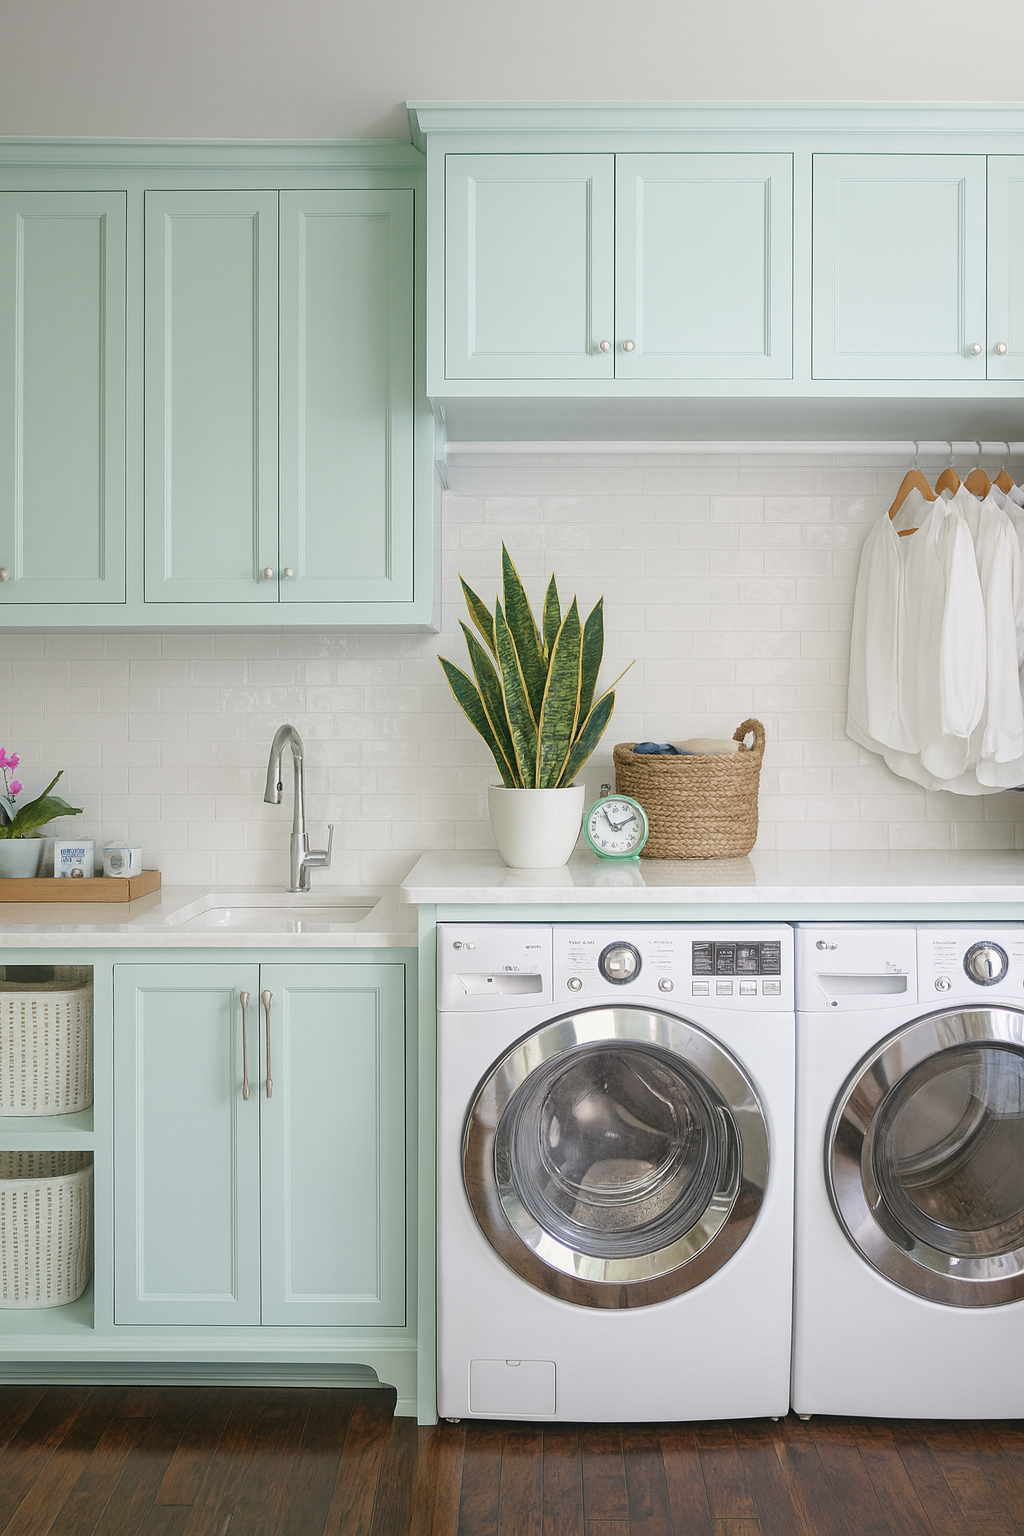

In [12]:
generator.generate_image_with_image_edit("datas/images/test1.jpg", "datas/images/730017_565845_3235.png", prompt)